<a href="https://colab.research.google.com/github/kopeomojola/Tokyo2020/blob/main/Olympic_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis with an RNN

<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/drive/1EaAYMOMrPz9bR6URojmgO1Ta9rwavCo1#scrollTo=dLvpRCsE-GnC">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/kopeomojola/Tokyo2020/blob/main/Olympic_Sentiment_Analysis.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td></table>

## Sentiment Analysis with an Recurrent Neural Network

We will use a RNN for sentiment analysis because we care for the sequence in the data.

### Imports
Importing numpy for 

In [ ]:
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

### Loading in Dataset

In [ ]:
url = 'https://raw.githubusercontent.com/kopeomojola/Tokyo2020/main/datas.csv'
data = pd.read_csv(url)
data = data.sample(frac=1).reset_index(drop=True)
print(data.shape)
data.head()

(9868, 10)


,Unnamed: 0,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,8314,Beer Olympics runners-up 🥈 https://t.co/lLKtS...,beer olympics runners up,0.00,0.000000,neutral,0.000,1.000,0.000,0.0000
1,3450,Olympic News #greatbritain #mofarah #olympics ...,olympic news greatbritain mofarah olympics ...,-0.10,0.087500,negative,0.239,0.761,0.000,-0.5719
2,4082,@VesuviusHambone @yomi_olympic @haramcart @tre...,olympic every video on any gender ba...,-0.45,0.800000,negative,0.217,0.704,0.079,-0.6908
3,4615,Team Toyota’s Jessie Diggins Becomes First Ame...,team toyota s jessie diggins becomes first ame...,0.05,0.183333,positive,0.000,0.838,0.162,0.4767
4,2542,@TheHoopCentral @RMCsport Rudy and Embiid play...,rudy and embiid playing in olympic for fra...,0.00,0.000000,positive,0.000,0.795,0.205,0.2023


Removing all columns except the sentiment and text column.

In [ ]:
data = data[['sentiment', 'text']]
data.head()

,sentiment,text
0,neutral,beer olympics runners up
1,negative,olympic news greatbritain mofarah olympics ...
2,negative,olympic every video on any gender ba...
3,positive,team toyota s jessie diggins becomes first ame...
4,positive,rudy and embiid playing in olympic for fra...


### Data exploration

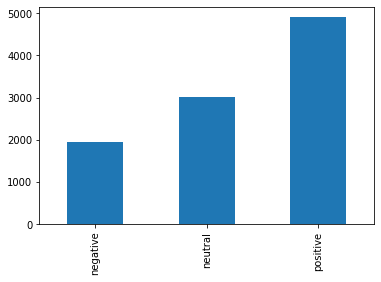

In [ ]:
data['sentiment'].value_counts().sort_index().plot.bar()

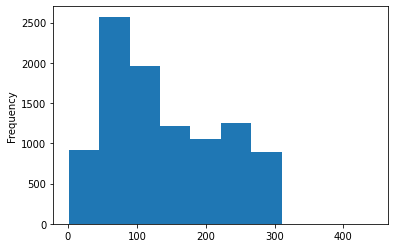

In [ ]:
data['text'].str.len().plot.hist()

### Preprocessing

In [ ]:
data['text'] = data['text'].str.replace('@', '')
data.head()

,sentiment,text
0,neutral,beer olympics runners up
1,negative,olympic news greatbritain mofarah olympics ...
2,negative,olympic every video on any gender ba...
3,positive,team toyota s jessie diggins becomes first ame...
4,positive,rudy and embiid playing in olympic for fra...


In [ ]:
data['text'].apply(lambda x: x.lower()) #transform text to lowercase
data['text'] = data['text'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x))
data['text'].head()

0                        beer olympics runners up     
1    olympic news  greatbritain  mofarah  olympics ...
2        olympic       every video on any gender ba...
3    team toyota s jessie diggins becomes first ame...
4        rudy and embiid playing in olympic for fra...
Name: text, dtype: object

In [ ]:
tokenizer = Tokenizer(num_words=5000, split=" ")
tokenizer.fit_on_texts(data['text'].values)

X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X) # padding our text vector so they all have the same length
X[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1181,
           4,  752,   56],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    2,
         13

### Creating model

In [ ]:
model = Sequential()
model.add(Embedding(5000, 256, input_length=X.shape[1]))
model.add(Dropout(0.3))
model.add(LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))
model.add(LSTM(256, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 80, 256)           1280000   
                                                                 
 dropout_1 (Dropout)         (None, 80, 256)           0         
                                                                 
 lstm_2 (LSTM)               (None, 80, 256)           525312    
                                                                 
 lstm_3 (LSTM)               (None, 256)               525312    
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 2,331,395
Trainable params: 2,331,395
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y = pd.get_dummies(data['sentiment']).values
[print(data['sentiment'][i], y[i]) for i in range(0,5)]

neutral [0 1 0]
negative [1 0 0]
negative [1 0 0]
positive [0 0 1]
positive [0 0 1]


[None, None, None, None, None]

### Training model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
batch_size = 64
epochs = 100

history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test,y_test), batch_size=batch_size, verbose=1)

Epoch 1/100
124/124 [==============================] - 93s 691ms/step - loss: 0.8224 - accuracy: 0.6426 - val_loss: 0.6636 - val_accuracy: 0.7107
Epoch 2/100
124/124 [==============================] - 85s 689ms/step - loss: 0.4640 - accuracy: 0.8209 - val_loss: 0.5347 - val_accuracy: 0.8004
Epoch 3/100
124/124 [==============================] - 86s 692ms/step - loss: 0.2836 - accuracy: 0.8988 - val_loss: 0.5369 - val_accuracy: 0.8085
Epoch 4/100
124/124 [==============================] - 85s 688ms/step - loss: 0.2061 - accuracy: 0.9311 - val_loss: 0.6269 - val_accuracy: 0.8146
Epoch 5/100
124/124 [==============================] - 86s 693ms/step - loss: 0.1681 - accuracy: 0.9451 - val_loss: 0.6751 - val_accuracy: 0.8110
Epoch 6/100
124/124 [==============================] - 85s 684ms/step - loss: 0.1174 - accuracy: 0.9628 - val_loss: 0.6631 - val_accuracy: 0.8161
Epoch 7/100
124/124 [==============================] - 84s 675ms/step - loss: 0.1026 - accuracy: 0.9683 - val_loss: 0.7422 -

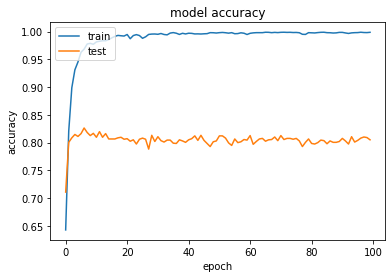

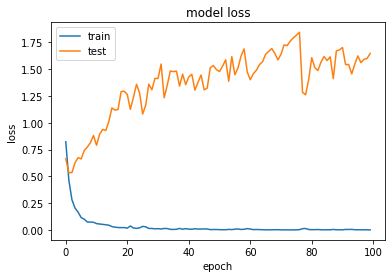

In [ ]:
#plot accuracy and recall
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




model.save('sentiment_analysis.h5')

### Testing model

In [ ]:
predictions = model.predict(X_test)

[print(data['text'][i], predictions[i], y_test[i]) for i in range(0, 5)]

beer olympics runners up      [1.0028591e-08 1.0083731e-09 1.0000000e+00] [0 0 1]
olympic news  greatbritain  mofarah  olympics  trackandfield mo farah pessimistic about track future after return from missing olympics       [2.9228140e-05 9.9995947e-01 1.1355282e-05] [0 1 0]
    olympic       every video on any gender based issue devolves into an argument in the comments section over who has it worse  which ends with a guy arguing that women s beauty standards for men are unrealistic and exclude 80  of men [6.5048146e-03 9.9346960e-01 2.5582189e-05] [0 1 0]
team toyota s jessie diggins becomes first american woman to medal in olympic long distance cross country race       [1.7789564e-07 2.9179082e-08 9.9999976e-01] [0 0 1]
    rudy and embiid playing in olympic for france      [8.7778903e-07 7.0928621e-07 9.9999845e-01] [0 0 1]


[None, None, None, None, None]

In [ ]:
pos_count, neu_count, neg_count = 0, 0, 0
real_pos, real_neu, real_neg = 0, 0, 0
for i, prediction in enumerate(predictions):
    if np.argmax(prediction)==2:
        pos_count += 1
    elif np.argmax(prediction)==1:
        neu_count += 1
    else:
        neg_count += 1
    
    if np.argmax(y_test[i])==2:
        real_pos += 1
    elif np.argmax(y_test[i])==1:    
        real_neu += 1
    else:
        real_neg +=1

print('Positive predictions:', pos_count)
print('Neutral predictions:', neu_count)
print('Negative predictions:', neg_count)
print('Real positive:', real_pos)
print('Real neutral:', real_neu)
print('Real negative:', real_neg)

Positive predictions: 1046
Neutral predictions: 557
Negative predictions: 371
Real positive: 981
Real neutral: 593
Real negative: 400


In [ ]:
total_result = int(real_pos) + int(real_neu) + int(real_neg)
print(total_result)

per_real_pos = (real_pos/total_result)*100
per_real_neu = (real_neu/total_result)*100
per_real_neg = (real_neg/total_result)*100
print(per_real_pos)
print(per_real_neu)
print(per_real_neg)
total_percentage = per_real_neg + per_real_pos + per_real_neu
print(total_percentage)

1974
49.69604863221885
30.040526849037484
20.263424518743665
100.0


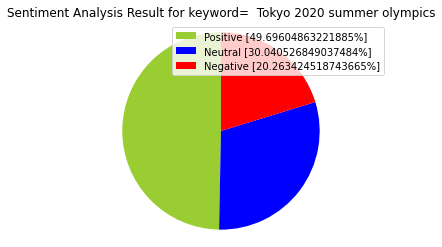

In [ ]:
keyword = "Tokyo 2020 summer olympics"
labels = ['Positive ['+str(per_real_pos)+'%]' , 'Neutral ['+str(per_real_neu)+'%]','Negative ['+str(per_real_neg)+'%]']
sizes = [real_pos, real_neu, real_neg]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()